# Updating the Prediction of Loehle and Scafetta (2011)

Loehle and Scafetta (2011) (hereafter LS11) propose a model for global mean surface temperatures (GMST) where the natural component is composed of a linear term and two cyclic terms, with periods of 20 and 60 years, to which a linear term is added (from approximately 1942 onwards) representing anthropogenic influences:

\begin{equation*}
   y(t) = A \cos\left[2\pi(t - T_1)/60 \right] + B \cos\left[2\pi(t - T_2)/20 \right] + C(t-1900) + D + \max\left[E + F\times(t-1950), 0\right].
\end{equation*}

The parameters of this model, taken from LS11 are as follows:

\begin{equation*}
   A = 0.121,~~
   B = 0.041,~~
   C = 0.0016,~~
   D = -0.317,~~
   E = 0.054,~~
   F = 0.0066,~~
   T_1 = 1998.58,~~
   T_2 = 1999.65.
\end{equation*}

First we import libraries for maths functions etc., plotting and downloading data:

In [1]:
import math
import matplotlib.pyplot as plt
import urllib.request

Next, we download the HadCRUT4-gl dataset from CRU webserver and extract the data, which are on alternate lines of the file.  The year is in the first column and the annual global mean surface temperature anomaly is in the last column.  Note Loehle and Scafetta (2011), use HadCRUT3-gl, but this has not been updated since 2014, so it can't be used to see how their model has fared since that time.

In [2]:
response = urllib.request.urlopen('https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT4-gl.dat')
year, temp = [], [];
for count, line in enumerate(response, start=1):
    if count % 2 == 1:
        line = line.split();
        year.append(int(line[0]))
        temp.append(float(line[-1]))

We then define a function that implements the LS11 model, with the parameters hard-coded.

In [3]:
def ls11(year) : 
    return -0.317 + 0.0016*(year - 1900) + 0.041*math.cos(2*math.pi*(year - 1999.65)/20) + 0.121*math.cos(2*math.pi*(year - 1998.58)/60) + max(0.054 + 0.0066*(year-1950), 0)

Lastly, we generate the predictions up to the last year in the observations and plot the results.

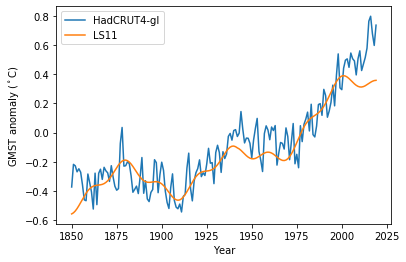

In [4]:
prediction = [ls11(y) for y in year]; 
plt.plot(year, temp, year, prediction);
plt.ylabel('GMST anomaly ($^\circ$C)');
plt.xlabel('Year');
plt.legend(['HadCRUT4-gl', 'LS11']);

## References:

[LS11] Craig Loehle and Nicola Scafetta, "Climate Change Attribution Using Empirical Decomposition of Climate Data", <i>The Open Atmospheric Science Journal</i>, volume 5, pages 74-86, 2011.